## Individual Project: Predicting Obesity Risk

In [228]:
# Loading environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [229]:
import os
os.getcwd()

'D:\\Data Science Foundations-6150\\Individual Projects'

In [230]:
# 1. Loading CSV file
file_path = f'{os.getcwd()}\\Obesity_DataSet.csv'
df = pd.read_csv(file_path)

In [231]:
# 2. Preprocessing dataset
print(f'Nulls in each column: \n{df.isna().sum()}')
# delete any rows with null data
df = df.dropna(axis = 0, how = 'any')

# assign numerical and categorical features
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(exclude=['number']).columns
categorical_features = categorical_features.drop('BMI_WHO')
print('numerical_features:', numerical_features, '\ncategorical_features:', categorical_features)

# one-hot encode for the categorical variables
df_clean = pd.get_dummies(df, columns=categorical_features, drop_first = True)

# convert 'Obese', 'OverWeight' into Ture and other into Flase with the new variable 'Target' as target variable
df_clean['Target'] = df_clean['BMI_WHO'].isin(['Obese', 'OverWeight'])
df_clean.drop(['BMI_WHO'], axis = 1, inplace=True)

Nulls in each column: 
BMI_WHO             97
Age                  0
Gender               0
Race1                0
Education          260
HHIncome           643
PhysActive           0
Smoke100           246
Diabetes             2
BPSysAve           276
TotChol            405
Alcohol12PlusYr    901
MaritalStatus      250
Work                 1
Height              57
Depressed          808
dtype: int64
numerical_features: Index(['Age', 'BPSysAve', 'TotChol', 'Height'], dtype='object') 
categorical_features: Index(['Gender', 'Race1', 'Education', 'HHIncome', 'PhysActive', 'Smoke100',
       'Diabetes', 'Alcohol12PlusYr', 'MaritalStatus', 'Work', 'Depressed'],
      dtype='object')


In [232]:
# 3.Split into train and test data
x = df_clean.drop(['Target'], axis = 1)
y = df_clean['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123, stratify=y)

In [233]:
# 4.Scale for logistic regression
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

The accuracy of Logistic Regression Model is 71.62%


Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression Model')

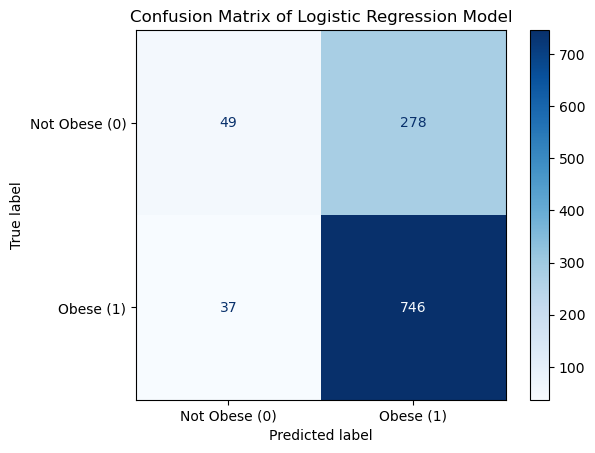

In [234]:
# 5.Logistic Regression Model
lg_model = LogisticRegression(random_state = 123, solver = 'liblinear') #'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'
lg_model.fit(x_train_scaled, y_train)
lg_y_pred = lg_model.predict(x_test_scaled)
lg_accu = accuracy_score(y_test, lg_y_pred) * 100
print(f'The accuracy of Logistic Regression Model is {round(lg_accu,2)}%')
class_labels = ['Not Obese (0)', 'Obese (1)']
cm_rf = ConfusionMatrixDisplay.from_predictions(y_test, lg_y_pred, display_labels = class_labels, cmap = plt.cm.Blues)
cm_rf.ax_.set_title("Confusion Matrix of Logistic Regression Model")

Best K (n_neighbors) found by CV: 1
The accuracy of Randon Forest Model is 83.06%


Text(0.5, 1.0, 'Confusion Matrix of K-Nearest Neighbors Model')

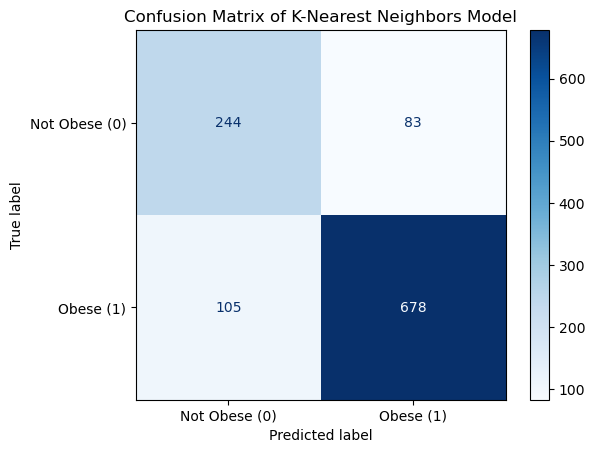

In [235]:
# 7.K-Nearest Neighbors Model
# find the best k by cross validation with 5 folds
cv_grid = {'n_neighbors': np.arange(1, 20)}
search_grid = GridSearchCV(KNeighborsClassifier(), cv_grid, cv = 5)
search_grid.fit(x_train_scaled, y_train)
print(f'Best K (n_neighbors) found by CV: {search_grid.best_params_['n_neighbors']}')

# train knn model with best k
knn_model = search_grid.best_estimator_
knn_y_prad = knn_model.predict(x_test_scaled)
knn_accu = accuracy_score(y_test, knn_y_prad) * 100
print(f'The accuracy of Randon Forest Model is {round(knn_accu,2)}%')
class_labels = ['Not Obese (0)', 'Obese (1)']
cm_rf = ConfusionMatrixDisplay.from_predictions(y_test, knn_y_prad, display_labels = class_labels, cmap = plt.cm.Blues)
cm_rf.ax_.set_title("Confusion Matrix of K-Nearest Neighbors Model")

The accuracy of Randon Forest Model is 88.56%


Text(0.5, 1.0, 'Confusion Matrix of Random Forest Model')

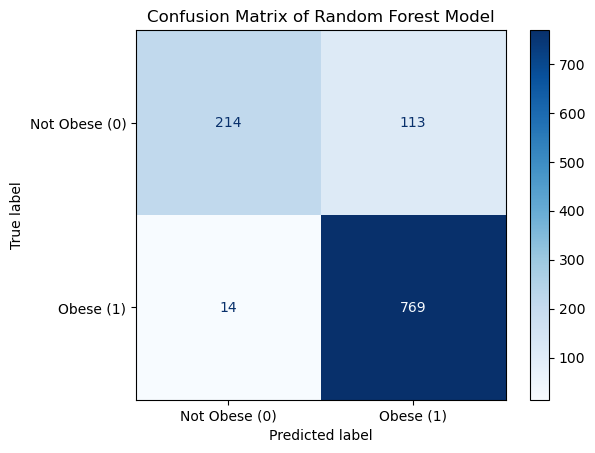

In [236]:
# 7.Random Forest Model
rf_model = RandomForestClassifier(random_state = 123, n_estimators = 500)
rf_model.fit(x_train_scaled, y_train)
rf_y_prad = rf_model.predict(x_test_scaled)
rf_accu = accuracy_score(y_test, rf_y_prad) * 100
print(f'The accuracy of Randon Forest Model is {round(rf_accu,2)}%')
class_labels = ['Not Obese (0)', 'Obese (1)']
cm_rf = ConfusionMatrixDisplay.from_predictions(y_test, rf_y_prad, display_labels = class_labels, cmap = plt.cm.Blues)
cm_rf.ax_.set_title("Confusion Matrix of Random Forest Model")

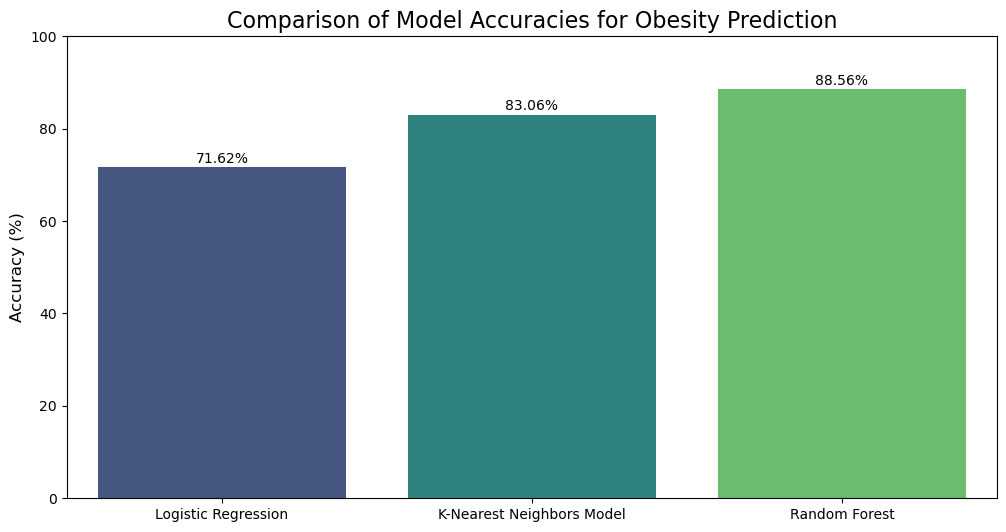

In [237]:
# 8.Plotting the results
model_accuracies = {'Logistic Regression': lg_accu, 'K-Nearest Neighbors Model':knn_accu, 'Random Forest': rf_accu}
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(12, 6))
sns.barplot(x = models, y = accuracies, hue = models, palette = 'viridis')
plt.ylabel('Accuracy (%)', fontsize = 12)
plt.ylim(0, 100)
plt.title('Comparison of Model Accuracies for Obesity Prediction', fontsize = 16)
for index, value in enumerate(accuracies):
    plt.text(index, value + 1, f"{value:.2f}%", color='black', ha="center")
plt.show()

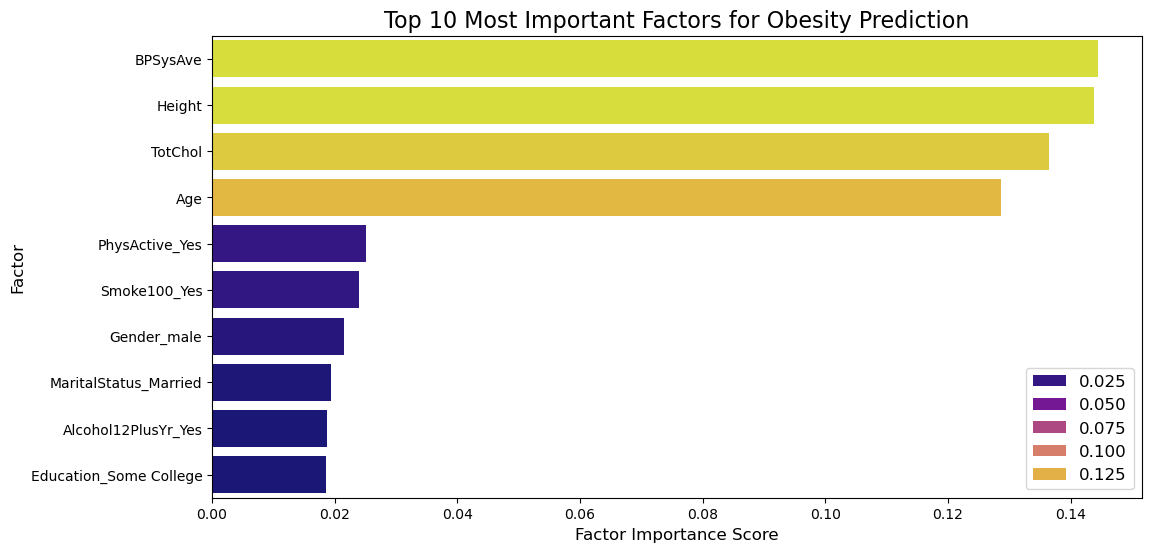

In [238]:
# 9.Analyze and Plot Feature Importance from Random Forest Model
feature_importances = pd.Series(rf_model.feature_importances_, index = x_train.columns).sort_values(ascending=False)
top_features = feature_importances.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x = top_features.values, y = top_features.index, hue = top_features.values, palette='plasma')
plt.xlabel('Factor Importance Score', fontsize = 12)
plt.ylabel('Factor', fontsize = 12)
plt.title(f'Top 10 Most Important Factors for Obesity Prediction', fontsize = 16)
plt.legend(loc = 'best', fontsize = 12)
plt.show()

The accuracy of Randon Forest Minimal Model is 88.56%


Text(0.5, 1.0, 'Confusion Matrix of Random Forest Minimal Model')

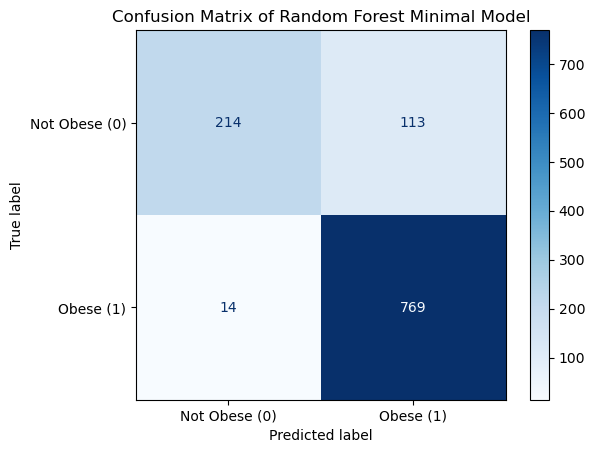

In [239]:
# 10.Remove less-important variables
x_train_minimal = x_train[['BPSysAve', 'Height', 'TotChol', 'Age']]
x_test_minimal = x_test[['BPSysAve', 'Height', 'TotChol', 'Age']]
x_train_minimal = scaler.fit_transform(x_train_minimal)
x_test_minimal = scaler.transform(x_test_minimal)
# Use Random Forst again and get accuracy
rf_model_minimal = RandomForestClassifier(random_state = 123, n_estimators = 500)
rf_model_minimal.fit(x_train_minimal, y_train)
rf_y_prad_minimal = rf_model_minimal.predict(x_test_minimal)
rf_accu_minimal = accuracy_score(y_test, rf_y_prad_minimal) * 100
print(f'The accuracy of Randon Forest Minimal Model is {round(rf_accu,2)}%')
class_labels = ['Not Obese (0)', 'Obese (1)']
cm_rf = ConfusionMatrixDisplay.from_predictions(y_test, rf_y_prad, display_labels = class_labels, cmap = plt.cm.Blues)
cm_rf.ax_.set_title("Confusion Matrix of Random Forest Minimal Model")